In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("customer_journey.csv")


In [3]:
df.head()


,SessionID,UserID,Timestamp,PageType,DeviceType,Country,ReferralSource,TimeOnPage_seconds,ItemsInCart,Purchased
0,session_0,user_2223,2025-01-20 22:53:34,home,Desktop,India,Social Media,55,0,0
1,session_1,user_2192,2025-02-26 12:57:10,home,Tablet,Germany,Email,99,0,0
2,session_1,user_2192,2025-02-26 12:59:11,product_page,Tablet,Germany,Email,121,0,0
3,session_2,user_1708,2025-06-24 15:40:46,home,Mobile,India,Google,160,0,0
4,session_3,user_2976,2025-06-11 07:21:02,home,Tablet,UK,Google,113,0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12719 entries, 0 to 12718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SessionID           12719 non-null  object
 1   UserID              12719 non-null  object
 2   Timestamp           12719 non-null  object
 3   PageType            12719 non-null  object
 4   DeviceType          12719 non-null  object
 5   Country             12719 non-null  object
 6   ReferralSource      12719 non-null  object
 7   TimeOnPage_seconds  12719 non-null  int64 
 8   ItemsInCart         12719 non-null  int64 
 9   Purchased           12719 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 993.8+ KB


In [5]:
control = df[df['group'] == 'control']
test = df[df['group'] == 'test']


KeyError: 'group'

In [6]:
df.columns



Index(['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country',
       'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased'],
      dtype='object')

In [7]:
df['PageType'].value_counts()



,count
PageType,
home,5000
product_page,3987
cart,1599
checkout,1123
confirmation,1010


In [8]:
control = df[df['PageType'] == 'product_page']
test = df[df['PageType'] == 'checkout']



In [9]:
print("Control:", control.shape)
print("Test:", test.shape)


Control: (3987, 10)
Test: (1123, 10)


In [10]:
Purchased


NameError: name 'Purchased' is not defined

In [11]:
df['Purchased']



,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
12714,0
12715,0
12716,0
12717,0


In [12]:
df['Purchased'].value_counts()


,count
Purchased,
0,7669
1,5050


In [13]:
subset = df[df['PageType'].isin(['product_page', 'checkout'])]

contingency = pd.crosstab(subset['PageType'], subset['Purchased'])
contingency


Purchased,0,1
PageType,,
checkout,113,1010
product_page,2977,1010


In [14]:
conversion_rates = subset.groupby('PageType')['Purchased'].mean()
conversion_rates


,Purchased
PageType,
checkout,0.899377
product_page,0.253323


In [15]:
df['column_name']



KeyError: 'column_name'

In [16]:
df.columns


Index(['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country',
       'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased'],
      dtype='object')

In [17]:
data = df[['PageType', 'Purchased']]
data.head()


,PageType,Purchased
0,home,0
1,home,0
2,product_page,0
3,home,0
4,home,0


In [18]:
ab_data = data[data['PageType'].isin(['product_page', 'checkout'])]


In [19]:
ab_data['PageType'].value_counts()


,count
PageType,
product_page,3987
checkout,1123


In [20]:
ab_data['Purchased'].value_counts()


,count
Purchased,
0,3090
1,2020


In [21]:
table = pd.crosstab(ab_data['PageType'], ab_data['Purchased'])
table


Purchased,0,1
PageType,,
checkout,113,1010
product_page,2977,1010


In [22]:
from scipy import stats

chi2, p_value, dof, expected = stats.chi2_contingency(table)
p_value


np.float64(0.0)

In [23]:
if p_value <= 0.05:
    print("Reject H₀ → Significant difference in purchase rates")
else:
    print("Fail to reject H₀ → No significant difference in purchase rates")


Reject H₀ → Significant difference in purchase rates


In [24]:
ab_data.groupby('PageType')['Purchased'].mean()


,Purchased
PageType,
checkout,0.899377
product_page,0.253323


In [25]:
table


Purchased,0,1
PageType,,
checkout,113,1010
product_page,2977,1010


In [26]:
ab_data.groupby('PageType')['Purchased'].mean()


,Purchased
PageType,
checkout,0.899377
product_page,0.253323


In [27]:
from scipy import stats

chi2, p_value, dof, expected = stats.chi2_contingency(table)
p_value


np.float64(0.0)

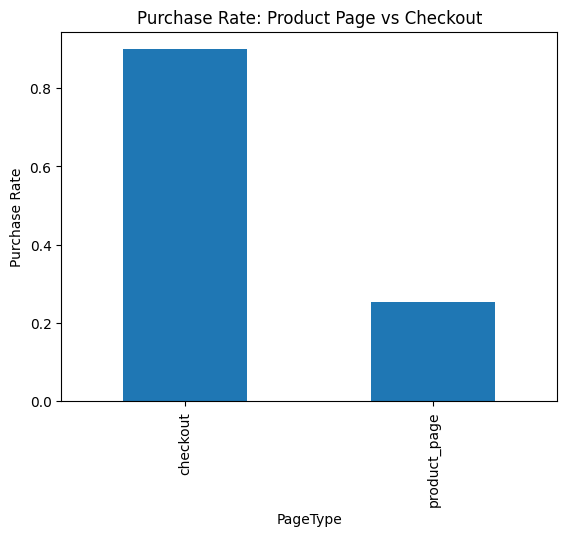

In [28]:
ab_data.groupby('PageType')['Purchased'].mean().plot(kind='bar')
plt.ylabel("Purchase Rate")
plt.title("Purchase Rate: Product Page vs Checkout")
plt.show()


In [29]:
!ls


'archive (3).zip'   customer_journey.csv   drive   sample_data


In [30]:
!cp "/content/drive/MyDrive/AB_Testing_Project.ipynb" /content/


cp: cannot stat '/content/drive/MyDrive/AB_Testing_Project.ipynb': No such file or directory


In [31]:
from google.colab import files
files.download('AB_Testing_Project.ipynb')


FileNotFoundError: Cannot find file: AB_Testing_Project.ipynb